In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


1. Uyarıların Bastırılması

Veri analizi yaparken,kullanılan kütüphaneler tarafından ekrana bazı uyarılar yansıtılabilir. Bu uyarılar genellikle eski sürümlerle uyumluluk, gelecekteki değişiklikler ya da veri yapılarıyla ilgili bilgilendirme amacı taşır. Ancak, analiz sürecine odaklanmak istediğimizde bu tür uyarılar dikkat dağıtıcı olabilir. Bu nedenle, yalnızca analiz çıktılarıyla ilgilenmek istiyorsak, uyarıları bastırmak için aşağıdaki kod bloğunu kullanabiliriz:

In [7]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

2. Veri Setinin Yüklenmesi ve İlk İncelemesi
   
Analize başlamadan önce, NASA tarafından sağlanan Near-Earth Objects (NEO) veri seti, CSV formatındaki dosyadan pandas kütüphanesinin read_csv() fonksiyonu kullanılarak içe aktarılır. Ardından, veri setinin ilk beş satırı head() fonksiyonu ile görüntülenir. Bu işlem, veri kümesinin yapısını tanımak, sütun adları ve veri türleri hakkında genel bir fikir edinmek açısından oldukça faydalıdır.

In [8]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo.csv')
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


📋 Veri Seti Yapısı ve Boyutu
Analize başlamadan önce veri setinin genel yapısını ve boyutunu incelemek önemlidir. Aşağıdaki kod ile:

df.columns.tolist() komutu sayesinde veri setindeki sütun (özellik) isimleri listelenmiştir.

df.shape komutu ile ise veri setinde toplam kaç satır (gözlem) ve kaç sütun (özellik) bulunduğu öğrenilmiştir.

In [18]:
print(df.columns.tolist())

['id', 'name', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object', 'absolute_magnitude', 'hazardous', 'mean_diameter', 'log_velocity', 'log_miss_distance', 'approach_date', 'days_to_approach', 'year', 'month', 'cluster', 'anomaly']


3. Asteroit Verilerinin Analizi: Veri Hazırlama, Görselleştirme ve Anomali Tespiti

Bu çalışma, NASA'nın Near-Earth Object (NEO) veri setini kullanarak asteroitlerin analizini kapsamaktadır. Kod, veri ön işleme, öznitelik mühendisliği, görselleştirme, kümeleme ve anomali tespiti gibi temel veri bilimi adımlarını içerir.

---

### 🔍 1. Veri Yükleme ve Eksik Değer Doldurma

İlk olarak, veri kümesi `pandas` ile okunmuştur. Eksik değerler kontrol edilmiş ve:
- Sayısal sütunlardaki eksik değerler ortanca (median) ile doldurulmuştur.
- Kategorik sütunlar (örneğin: `hazardous`) en sık görülen (mod) değer ile doldurulmuştur.

---

### 🛠️ 2. Özellik Mühendisliği

Asteroit özelliklerini daha anlamlı hale getirmek için bazı yeni sütunlar oluşturulmuştur:
- `mean_diameter`: Min ve max çap değerlerinin ortalaması
- `log_velocity`: Göreli hızın logaritması
- `log_miss_distance`: Yaklaşım mesafesinin logaritması
- `days_to_approach`: Bugünden yaklaşım tarihine kalan gün
- `year` ve `month`: Yaklaşım tarihinden yıl ve ay bilgileri



---

### 📊 3. Görselleştirmeler

- **Yıllara göre gözlem sayısı** bar grafiği ile sunulmuştur.
- **Yıllık ortalama asteroit çapı** çizgi grafiği ile gösterilmiştir.

---

### 📦 4. Kümeleme (Clustering)

`KMeans` algoritması kullanılarak asteroitler benzer özelliklerine göre 4 kümeye ayrılmıştır. Kullanılan özellikler:
- `mean_diameter`
- `log_velocity`
- `log_miss_distance`

---

### ⚠️ 5. Anomali Tespiti

`IsolationForest` yöntemi ile verideki olası aykırı (anormal) gözlemler tespit edilmiştir. Bu yöntem, özellikle uç değerleri belirlemek için uygundur.

---

### 📈 6. Korelasyon Matrisi

Asteroit özellikleri arasındaki ilişkiyi görselleştirmek için bir ısı haritası (`heatmap`) oluşturulmuştur. Bu grafik, çap, hız, mesafe ve parlaklık gibi değişkenlerin birbiriyle olan istatistiksel korelasyonunu gösterir.

---

### 📌 Genel Amaç

Bu adımlar, asteroit verisinin daha iyi anlaşılması, sınıflandırılması ve olası tehlikeli asteroitlerin ayırt edilmesine yönelik bir temel sunmaktadır. Veri, artık hem görsel olarak analiz edilmiş hem de modelleme için uygun hale getirilmiştir.



Eksik değer sayıları:
 id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


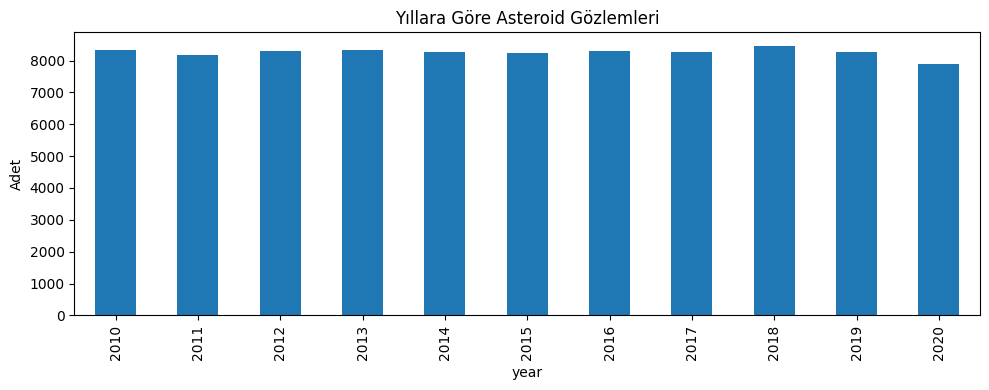

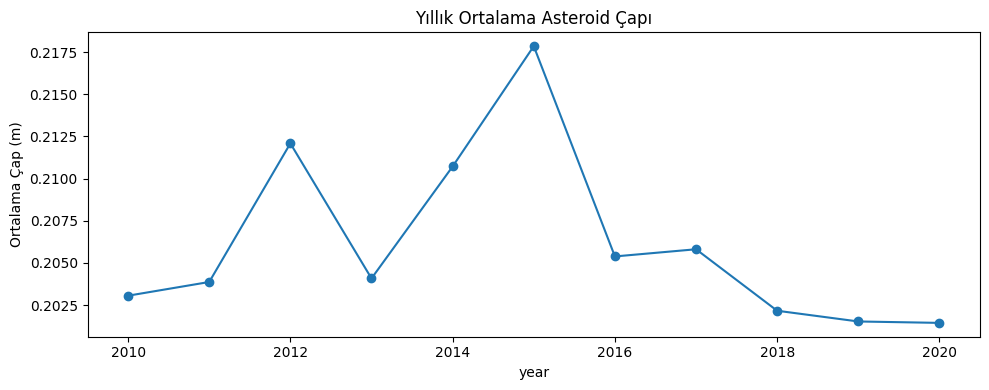

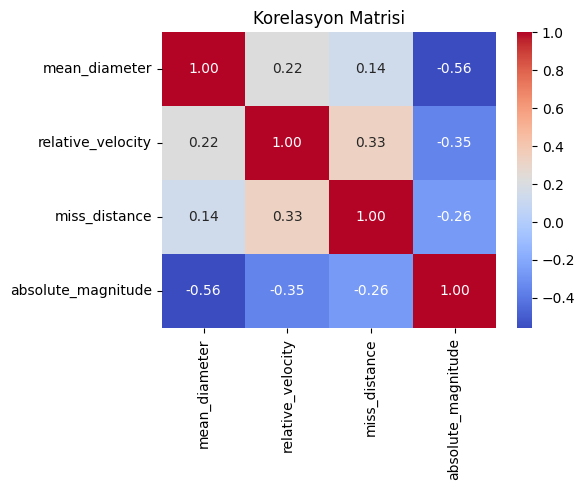

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,mean_diameter,log_velocity,log_miss_distance,approach_date,days_to_approach,year,month,cluster,anomaly
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,1.938843,9.515635,17.819926,2015-08-28,-3558,2015,8,3,-1
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,0.430073,11.206261,17.933541,2020-10-10,-1688,2020,10,0,1
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,1.168268,11.646229,17.723500,2010-08-22,-5390,2010,8,0,1
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,0.156150,10.117199,17.051636,2012-05-09,-4764,2012,5,3,1
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,0.412613,10.662861,17.650125,2011-09-10,-5006,2011,9,0,1


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# -------------------- VERİ OKUMA --------------------
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo.csv')

# -------------------- EKSİK DEĞER DOLDURMA --------------------
print("Eksik değer sayıları:\n", df.isnull().sum())

num_cols = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = ['hazardous'] if 'hazardous' in df.columns else []
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# -------------------- FEATURE ENGINEERING --------------------
df['mean_diameter'] = (df['est_diameter_min'] + df['est_diameter_max']) / 2
df['log_velocity'] = np.log1p(df['relative_velocity'])
df['log_miss_distance'] = np.log1p(df['miss_distance'])

# Eğer approach_date varsa kullan, yoksa simülasyon (not: simülasyon gerçek veri varsa kaldırılmalı)
if 'approach_date' in df.columns:
    df['approach_date'] = pd.to_datetime(df['approach_date'])
else:
    df['approach_date'] = pd.to_datetime("2010-01-01") + pd.to_timedelta(
        np.random.randint(0, 4000, df.shape[0]), unit='D'
    )

df['days_to_approach'] = (df['approach_date'] - pd.to_datetime("today")).dt.days
df['year'] = df['approach_date'].dt.year
df['month'] = df['approach_date'].dt.month

# -------------------- GRAFİKLER --------------------
plt.figure(figsize=(10, 4))
df['year'].value_counts().sort_index().plot(kind='bar', title='Yıllara Göre Asteroid Gözlemleri', ylabel='Adet')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
df.groupby('year')['mean_diameter'].mean().plot(marker='o', title='Yıllık Ortalama Asteroid Çapı')
plt.ylabel('Ortalama Çap (m)')
plt.tight_layout()
plt.show()

# -------------------- CLUSTERING --------------------
features_for_clustering = df[['mean_diameter', 'log_velocity', 'log_miss_distance']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(features_for_clustering)

# -------------------- ANOMALY DETECTION --------------------
iso = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = iso.fit_predict(features_for_clustering)

# -------------------- KORELASYON MATRİSİ --------------------
plt.figure(figsize=(6, 5))
corr_matrix = df[['mean_diameter', 'relative_velocity', 'miss_distance', 'absolute_magnitude']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasyon Matrisi")
plt.tight_layout()
plt.show()

df.head()



4. Tehlikeli Asteroitlerin Analizi ve Özellik Sıralaması

Bu bölümde, NASA'nın Near-Earth Object (NEO) veri setinde yer alan asteroitlerin **tehlikeli olup olmadıklarına göre** istatistiksel analizleri yapılmakta ve bu durumu etkileyen değişkenlerin önemi ölçülmektedir.

---

### 🔬 1. Tehlikeli ve Güvenli Asteroitlerin Özelliklerinin Karşılaştırılması

Veri seti, `hazardous` sütununa göre iki gruba ayrılmıştır:
- **Tehlikeli asteroitler** (`hazardous = True`)
- **Güvenli asteroitler** (`hazardous = False`)

Her iki grup için aşağıdaki değişkenlerin istatistiksel özetleri alınmıştır:
- `mean_diameter`: Ortalama çap
- `relative_velocity`: Dünya’ya göre göreli hız
- `miss_distance`: Dünya’ya yaklaşım mesafesi

Ayrıca, bu değişkenlerin dağılımları `boxplot` grafiklerle karşılaştırılmıştır. Böylece, tehlikeli asteroitlerin fiziksel ve dinamik özelliklerinin güvenli olanlara göre nasıl farklılık gösterdiği görselleştirilmiştir.

---

### 🧠 2. Özelliklerin Etkisini Ölçme (Mutual Information)

Asteroitlerin `hazardous` olup olmamasını etkileyen değişkenlerin önemi **Mutual Information (MI)** yöntemiyle ölçülmüştür. Kullanılan değişkenler:

- `mean_diameter`
- `log_relative_velocity`: Hızın logaritmik dönüşümü
- `log_miss_distance`: Mesafenin logaritmik dönüşümü
- `absolute_magnitude`: Mutlak parlaklık

Bu analiz, her özelliğin tehlike olasılığına ne kadar bilgi kattığını ölçerek sıralama yapar. Sonuçlar yatay çubuk grafik ile sunulmuştur.

---

### 📈 3. Tehlikeli Asteroitlerin Yıllara Göre Değişimi

Zaman içerisinde tespit edilen **tehlikeli asteroit sayısındaki eğilim**, yıllık bazda analiz edilmiştir. Bu sayede, gözlem sıklığının zamanla artıp artmadığı ya da belirli dönemlerde artış olup olmadığı gözlemlenebilir.

---

### 🧭 Genel Amaç

Bu analizle, hangi fiziksel/dinamik özelliklerin asteroitlerin tehlike oluşturup oluşturmadığını daha iyi anlamak ve zamansal değişimleri izleyerek daha bilinçli gözlem ve analizler yapılması hedeflenmiştir.


Tehlikeli Asteroitlerin İstatistiksel Özeti:
       mean_diameter  relative_velocity  miss_distance
count    8840.000000        8840.000000   8.840000e+03
mean        0.475919       62794.337025   3.994623e+07
std         0.480717       27175.110049   2.111883e+07
min         0.142411        5908.291826   1.432727e+05
25%         0.229902       43017.810183   2.172841e+07
50%         0.326244       58658.010358   4.098372e+07
75%         0.515221       78785.820511   5.852393e+07
max         6.691795      193386.975218   7.479095e+07

Güvenli Asteroitlerin İstatistiksel Özeti:
       mean_diameter  relative_velocity  miss_distance
count   81996.000000       81996.000000   8.199600e+04
mean        0.177110       46479.153953   3.675609e+07
std         0.474174       24560.334742   2.245904e+07
min         0.000985         203.346433   6.745533e+03
25%         0.028415       27636.010582   1.672851e+07
50%         0.065094       42565.504033   3.748745e+07
75%         0.166549       6106

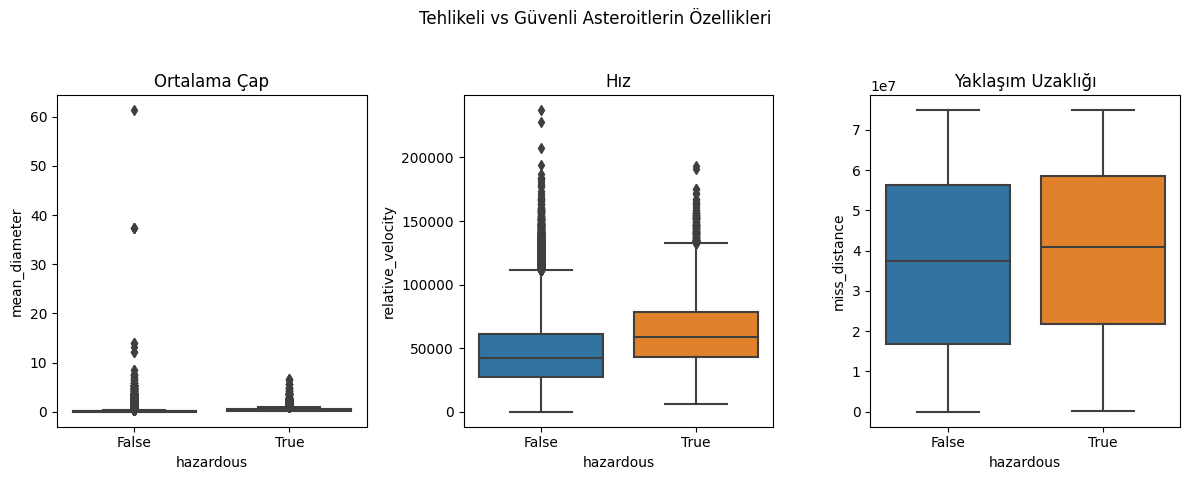

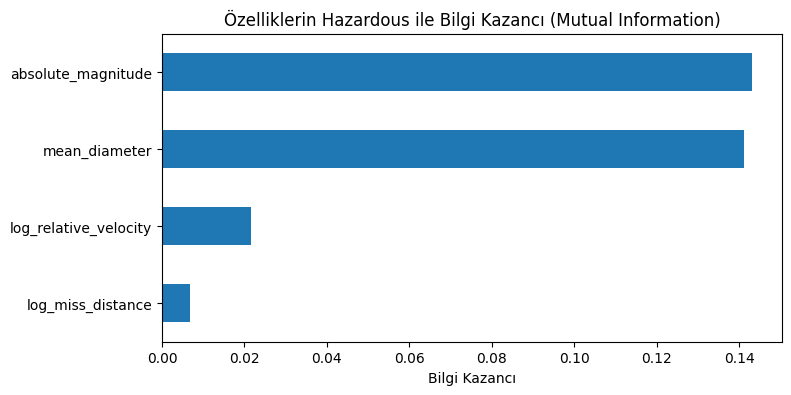

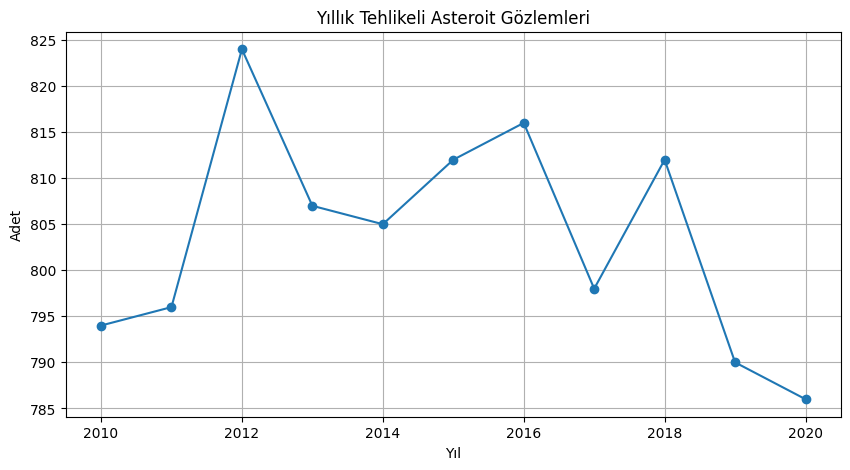

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Varsayalım df elimizdeki NASA NEO veri seti DataFrame'i
# df'nin temel kolonları: 'hazardous' (bool), 'mean_diameter', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'year'

# 1. Tehlikeli ve Güvenli Asteroitlerin Özelliklerinin Karşılaştırılması

# İstatistiksel özetler
print("Tehlikeli Asteroitlerin İstatistiksel Özeti:")
print(df[df['hazardous'] == True][['mean_diameter', 'relative_velocity', 'miss_distance']].describe())

print("\nGüvenli Asteroitlerin İstatistiksel Özeti:")
print(df[df['hazardous'] == False][['mean_diameter', 'relative_velocity', 'miss_distance']].describe())

# Boxplot karşılaştırması
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='hazardous', y='mean_diameter')
plt.title('Ortalama Çap')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='hazardous', y='relative_velocity')
plt.title('Hız')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='hazardous', y='miss_distance')
plt.title('Yaklaşım Uzaklığı')

plt.suptitle('Tehlikeli vs Güvenli Asteroitlerin Özellikleri')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2. Mutual Information ile Özellik Sıralaması

# Özellikler için log dönüşümleri ile yeni değişkenler oluşturulabilir (log relative_relative_velocity ve log miss distance)
import numpy as np

df['log_relative_velocity'] = np.log1p(df['relative_velocity'])
df['log_miss_distance'] = np.log1p(df['miss_distance'])

X = df[['mean_diameter', 'log_relative_velocity', 'log_miss_distance', 'absolute_magnitude']]
y = df['hazardous'].astype(int)

mi_scores = mutual_info_classif(X, y, discrete_features=False)

mi_series = pd.Series(mi_scores, index=X.columns).sort_values()

plt.figure(figsize=(8, 4))
mi_series.plot(kind='barh')
plt.title('Özelliklerin Hazardous ile Bilgi Kazancı (Mutual Information)')
plt.xlabel('Bilgi Kazancı')
plt.show()

# 3. Tehlikeli Asteroitlerin Zamanla Eğilimi

haz_yearly = df[df['hazardous']].groupby('year').size()

plt.figure(figsize=(10, 5))
haz_yearly.plot(marker='o')
plt.title('Yıllık Tehlikeli Asteroit Gözlemleri')
plt.xlabel('Yıl')
plt.ylabel('Adet')
plt.grid(True)
plt.show()


5. KMeans Clustering Öncesi Veri Hazırlama Adımları

Bu bölümde, NASA'nın Near Earth Object (NEO) veri seti üzerinde KMeans kümeleme algoritması için gerekli olan ön işleme adımları gerçekleştirilmiştir:

Ortalama Çap Hesaplama
Asteroitlerin minimum (est_diameter_min) ve maksimum (est_diameter_max) çap değerlerinin ortalaması alınarak mean_diameter değişkeni oluşturulmuştur. Bu değişken, asteroidin boyutunu tek bir metrikle temsil etmeye yardımcı olur. Kolonlardan biri eksikse kullanıcıya uyarı verilir.

Log Dönüşümleri (Veri Normalizasyonu)
relative_velocity (göreli hız) ve miss_distance (Dünya'ya yaklaşım mesafesi) değişkenleri log(1+x) dönüşümüne tabi tutulmuştur. Bu dönüşüm, uç değerlerin etkisini azaltarak verinin daha normal dağılmasını sağlar. Sıfır değerler NaN ile değiştirilip 0 ile doldurularak log işleminden kaynaklı matematiksel hatalar engellenmiştir.

KMeans İçin Kullanılacak Özelliklerin Belirlenmesi
Kümelenecek değişkenler:

mean_diameter

log_relative_velocity

log_miss_distance

absolute_magnitude
Bu dört özellik, asteroidlerin fiziksel ve hareket özelliklerini temsil eder.

Eksik Değer Temizliği
Kümelenecek her özellikteki eksik değerler, median (ortanca) değeri ile doldurularak veri setinin bütünlüğü korunmuştur.

Ölçeklendirme (Standardization)
KMeans algoritması, mesafe tabanlı bir yöntem olduğundan değişkenlerin aynı ölçekte olması gerekir. Bu nedenle, tüm özellikler StandardScaler kullanılarak standart normal dağılıma (ortalama=0, std=1) dönüştürülmüştür.

✅ Sonuç olarak, veriler KMeans algoritması için hazır hale getirilmiştir. Kod sonunda oluşturulan X_scaled matrisinin boyutu, işlenecek örnek sayısını ve öznitelik sayısını gösterir.

In [24]:
from sklearn.preprocessing import StandardScaler

# 1. Ortalama çapı hesapla (Eksik değer kontrolü ile)
if 'est_diameter_min' in df.columns and 'est_diameter_max' in df.columns:
    df['mean_diameter'] = (df['est_diameter_min'] + df['est_diameter_max']) / 2
else:
    print("Est_diameter_min veya est_diameter_max kolonları eksik!")

# 2. Log dönüşümleri yap (Eksik veriler ve sıfır değerler kontrolü)
df['log_relative_velocity'] = np.log1p(df['relative_velocity'].replace(0, np.nan)).fillna(0)
df['log_miss_distance'] = np.log1p(df['miss_distance'].replace(0, np.nan)).fillna(0)

# 3. KMeans için kullanılacak özellikler
features_for_kmeans = ['mean_diameter', 'log_relative_velocity', 'log_miss_distance', 'absolute_magnitude']

# 4. Özellikler için eksik değer kontrolü (naN olanlar median ile doldurulabilir)
df[features_for_kmeans] = df[features_for_kmeans].apply(lambda x: x.fillna(x.median()))

# 5. Özellikleri seç ve ölçeklendir
X_kmeans = df[features_for_kmeans]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)

print("KMeans için veriler hazır. Ölçeklendirilmiş özellik matrisi boyutu:", X_scaled.shape)


KMeans için veriler hazır. Ölçeklendirilmiş özellik matrisi boyutu: (90836, 4)


### KMeans Kümeleme için Veri Hazırlığı

Bu adımda, kümeleme analizinde kullanılacak özellikler hazırlanmıştır:

1. **Ortalama Çapın Hesaplanması:** `est_diameter_min` ve `est_diameter_max` kolonlarının ortalaması alınarak `mean_diameter` oluşturuldu.
2. **Logaritmik Dönüşümler:** `relative_velocity` ve `miss_distance` değişkenlerine logaritmik dönüşüm (`log1p`) uygulanarak dağılımların normalize edilmesi sağlandı.
3. **Özellik Seçimi:** Kümeleme algoritmasında kullanılacak olan dört özellik (`mean_diameter`, `log_relative_velocity`, `log_miss_distance`, `absolute_magnitude`) seçildi.
4. **Özellik Ölçeklendirme:** KMeans algoritmasının mesafeye dayalı çalışması nedeniyle, seçilen özellikler `StandardScaler` ile standartlaştırıldı.

Bu işlemler sonucunda, KMeans için uygun ve ölçeklendirilmiş bir özellik matrisi oluşturuldu.


6. KMeans Kümeleme: Elbow Yöntemi ve Görselleştirme

   
Bu adımda, standartlaştırılmış veriler üzerinde KMeans algoritması kullanılarak asteroitleri benzer özelliklerine göre kümeliyoruz. En uygun küme sayısını bulmak için Elbow yöntemi uygulanmıştır.

1. 🚩 Elbow Yöntemi ile En Uygun Küme Sayısını Belirleme
inertia: KMeans algoritmasının her bir kümeleme sonucu için hesapladığı "within-cluster sum of squares" (WSS) değerleri saklanır.

K_range: 1'den 10'a kadar olan olası küme sayıları değerlendirilir.

Her k değeri için KMeans modeli eğitilir ve inertia değeri hesaplanır.

2. 📈 Elbow Grafiği Oluşturma
Bu grafikte, küme sayısına karşılık gelen inertia değerleri çizilir.

"Dirsek" (elbow) noktası, inertia değerindeki düşüşün yavaşladığı noktadır. Bu, ideal küme sayısını gösterir.

3. ✅ Optimal Küme Sayısı ile Model Eğitimi ve Etiketleme
Elbow grafiği incelenerek ideal k değeri seçilir (örneğin k=3).

Seçilen k ile model yeniden eğitilir ve her gözlem bir kümeye atanır.

Küme etiketleri df['cluster'] kolonuna eklenir.

4. 🔍 Küme Dağılımını İnceleme

5. 🖼️ Kümeleme Sonuçlarının Görselleştirilmesi
Kümeleme sonuçları, mean_diameter ve log_relative_velocity eksenlerinde renkli bir scatter plot ile görselleştirilir.

🔍 Bu görselleştirme, kümeler arasındaki ayrımı sezgisel olarak değerlendirmeye yardımcı olur. Özellikle asteroitlerin boyutları ve hızları temelinde nasıl gruplaştığını anlamak için etkilidir.

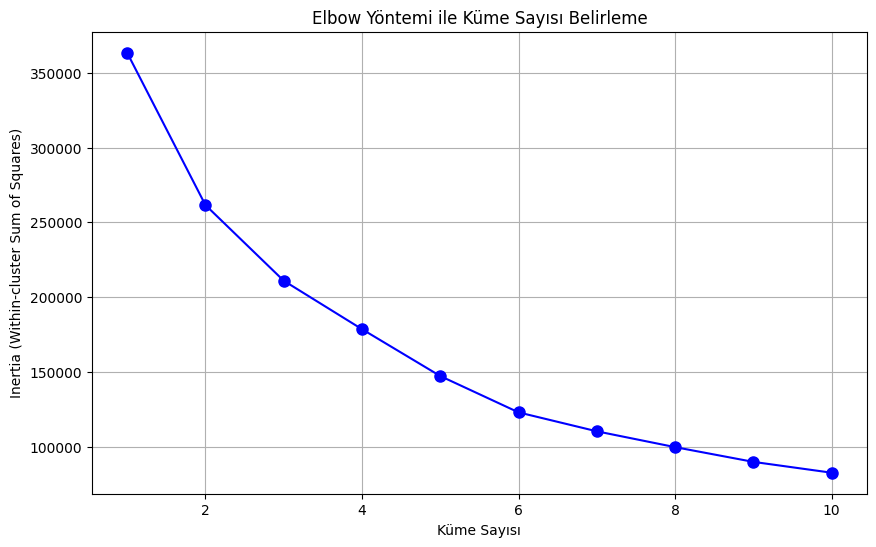

Seçilen küme sayısı: 3
cluster
2    45933
0    30220
1    14683
Name: count, dtype: int64


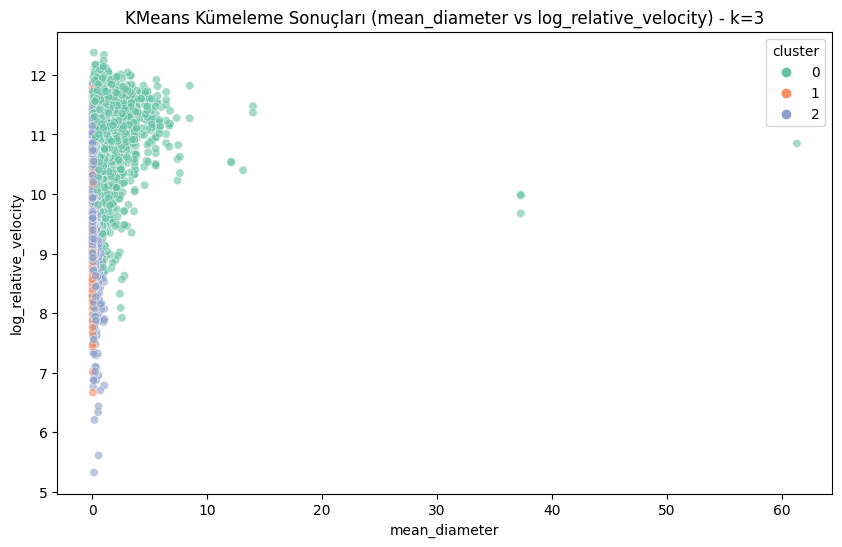

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Elbow Yöntemi ile en uygun küme sayısını bulalım
inertia = []  # Inertia değerlerini tutacağız
K_range = range(1, 11)  # Küme sayısını 1'den 10'a kadar kontrol edelim

# 2. KMeans'i her bir k değeri için çalıştır ve inertia değerlerini hesapla
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 3. Inertia grafiğini çizerek Elbow noktası üzerinde gözlem yapalım
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Yöntemi ile Küme Sayısı Belirleme')
plt.grid(True)
plt.show()

# 4. Elbow noktasını gözlemleyerek küme sayısını seçelim
k_optimal = 3  # Örnek olarak elbow noktasındaki k sayısını seçiyoruz

# 5. Seçilen küme sayısını kullanarak KMeans modelini eğitelim
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)

# 6. Küme etiketlerini df'ye ekleyelim
df['cluster'] = kmeans.labels_

# 7. Küme dağılımını inceleyelim
print(f"Seçilen küme sayısı: {k_optimal}")
print(df['cluster'].value_counts())

# 8. Kümeleme sonuçlarını görselleştirelim (mean_diameter ve log_relative_velocity ile)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['mean_diameter'], 
    y=df['log_relative_velocity'], 
    hue=df['cluster'], 
    palette='Set2',
    alpha=0.6
)
plt.title(f'KMeans Kümeleme Sonuçları (mean_diameter vs log_relative_velocity) - k={k_optimal}')
plt.show()


7. Kümeleme Sonuçlarının Özelliklere Göre Ortalamaları

Bu kod bloğunda, KMeans algoritması ile belirlenen kümeler baz alınarak her kümenin temel özelliklerinin ortalamaları hesaplanmaktadır. 

- `mean_diameter`: Asteroitlerin ortalama çapı
- `log_relative_velocity`: Göreli hızın logaritmik dönüşümü
- `log_miss_distance`: Iskalama mesafesinin logaritmik dönüşümü
- `absolute_magnitude`: Mutlak büyüklük değeri

Her küme için bu özelliklerin ortalamaları hesaplanarak, kümelerin karakteristik özellikleri özetlenir. Böylece kümeler arası farklar ve benzerlikler daha net anlaşılır.

```python
# Kümeleme sonuçlarının ortalamalarını görmek için yeni küme sayısına göre gruplayalım
cluster_summary = df.groupby('cluster')[['mean_diameter', 'log_relative_velocity', 'log_miss_distance', 'absolute_magnitude']].mean()

# Küme özetini yazdıralım
print(f"Küme Sayısı: {k_optimal}")
print(cluster_summary)

In [26]:
# Kümeleme sonuçlarının ortalamalarını görmek için yeni küme sayısına göre gruplayalım
cluster_summary = df.groupby('cluster')[['mean_diameter', 'log_relative_velocity', 'log_miss_distance', 'absolute_magnitude']].mean()

# Küme özetini yazdıralım
print(f"Küme Sayısı: {k_optimal}")
print(cluster_summary)



Küme Sayısı: 3
         mean_diameter  log_relative_velocity  log_miss_distance  \
cluster                                                            
0             0.495562              11.031267          17.530823   
1             0.041032              10.339043          14.949812   
2             0.068601              10.459373          17.414886   

         absolute_magnitude  
cluster                      
0                 20.410291  
1                 25.827485  
2                 24.842357  


### Küme ve "Hazardous" Etiketi Karşılaştırması

Bu kod parçası, KMeans kümeleme sonuçlarına dayalı olarak her küme için `hazardous` (tehlikeli olup olmadığı) etiketlerinin nasıl dağıldığını incelemek için kullanılır.

1. **Çapraz Tablo (Crosstab) Oluşturulması:**
   - `pd.crosstab(df['cluster'], df['hazardous'], normalize='index')` fonksiyonu ile, her bir küme için `hazardous` etiketlerinin yüzdelik dağılımı hesaplanır. Yani, her küme içerisindeki tehlikeli (1) ve tehlikesiz (0) asteroidlerin oranları bulunur.
   
2. **Heatmap Görselleştirmesi:**
   - `sns.heatmap(ct, annot=True, cmap='Blues')` ile çapraz tablo üzerinden bir ısı haritası (heatmap) oluşturulur. 
   - `annot=True` parametresi, her hücredeki yüzdelik değerlerin görüntülenmesini sağlar.
   - `cmap='Blues'` parametresi ise renk paletini mavi tonlarında ayarlayarak, her hücredeki değeri farklı renk tonları ile gösterir.
   
   Grafikte, **X ekseninde** `hazardous` etiketlerinin (0: tehlikesiz, 1: tehlikeli) bulunma durumu, **Y ekseninde ise** kümeler yer alır.

### Grafik Ne Anlatır?
Bu heatmap, her bir küme için `hazardous` etiketinin dağılımını görsel olarak sunar. Her hücredeki renk yoğunluğu, o kümedeki "tehlikeli" (1) ve "tehlikesiz" (0) asteroidlerin oranlarını temsil eder. Mavi renk tonları ne kadar koyuysa, o kümedeki o etiketin oranı o kadar yüksek olur.

Bu görselleştirme, kümeler arasında `hazardous` etiketinin nasıl farklılaştığını anlamamıza yardımcı olur ve hangi kümelerde daha fazla tehlikeli asteroid bulunduğunu gösterir.


Cluster ve Hazardous Etiketi Karşılaştırması (Küme Sayısı: 3)
hazardous     False     True 
cluster                      
0          0.737591  0.262409
1          0.980998  0.019002
2          0.986263  0.013737


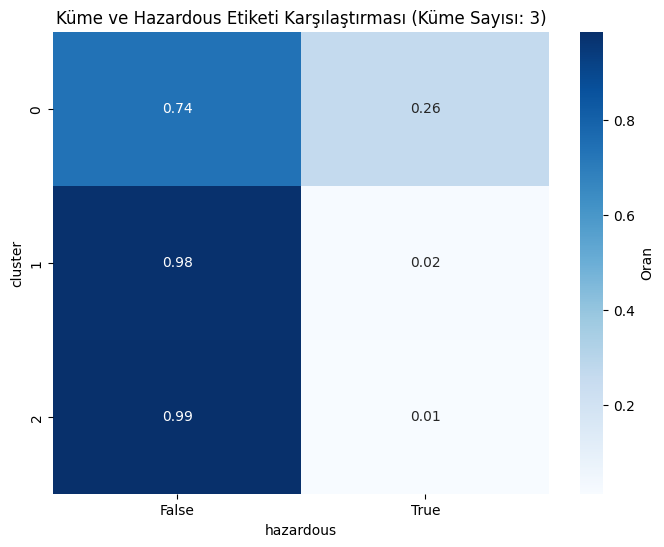

In [27]:
# Küme ve hazardous etiketleri arasındaki ilişkiyi crosstab ile analiz et
ct = pd.crosstab(df['cluster'], df['hazardous'], normalize='index')

# Crosstab tablosunu yazdır
print(f"Cluster ve Hazardous Etiketi Karşılaştırması (Küme Sayısı: {k_optimal})")
print(ct)

# Heatmap ile görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Oran'})
plt.title(f'Küme ve Hazardous Etiketi Karşılaştırması (Küme Sayısı: {k_optimal})')
plt.show()



### Elbow Yöntemi ile Küme Sayısı Belirleme

Bu kod bloğu, KMeans kümeleme algoritması için optimal küme sayısını belirlemek amacıyla **Elbow (Dirsek) Yöntemi**ni uygular.

- **`K` aralığı:** 1'den 10'a kadar farklı küme sayıları denenir.
- Her `k` değeri için KMeans modeli eğitilir ve modelin **inertia** (küme içi kareler toplamı) değeri hesaplanır.
  - **Inertia**, her bir noktanın kendi küme merkezine olan uzaklıklarının karelerinin toplamıdır.
  - Küme sayısı arttıkça inertia azalır ancak azalma hızı belirli bir noktadan sonra yavaşlar.

- Sonuçta, `k` değerlerine karşılık gelen inertia değerleri bir grafik üzerinde çizilir.
- Grafik üzerinde, inertia'nın hızlı düştüğü ve ardından düşüşün yavaşladığı (dirsek şeklinde) nokta, optimal küme sayısını gösterir.

**Grafiğin amacı:**  
Optimal küme sayısını seçerken, gereksiz yere çok küme oluşturmaktan kaçınmak ve veri yapısına en uygun sayıyı belirlemektir.


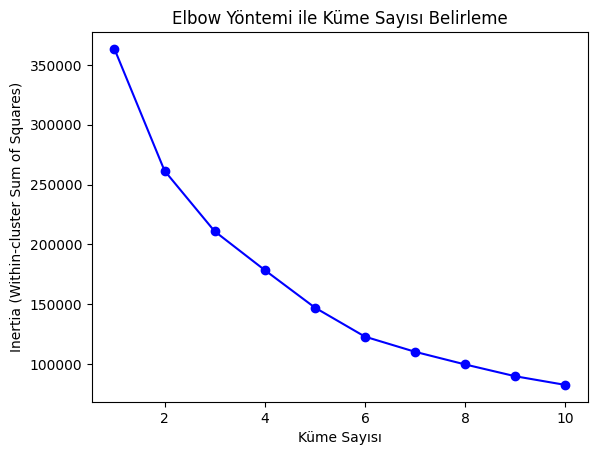

cluster
2    45933
0    30220
1    14683
Name: count, dtype: int64


In [28]:
# 1. Elbow Yöntemi ile uygun küme sayısını buluyoruz
inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Elbow plotu çiz
plt.plot(K, inertia, 'bo-')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Yöntemi ile Küme Sayısı Belirleme')
plt.show()

# 2. En uygun k'yi (k_optimal) bul
k_optimal = 3  # Burada k_optimal'i daha önce bulmuştuk

# 3. KMeans modeli ile kümeleme işlemi
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)

# 4. Küme etiketlerini df'ye ekle
df['cluster'] = kmeans.labels_

# 5. Küme dağılımını incele
print(df['cluster'].value_counts())
